In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shap

ROC AUC Score: 0.77
Accuracy: 0.79
Confusion Matrix:
[[25  4]
 [ 3  2]]


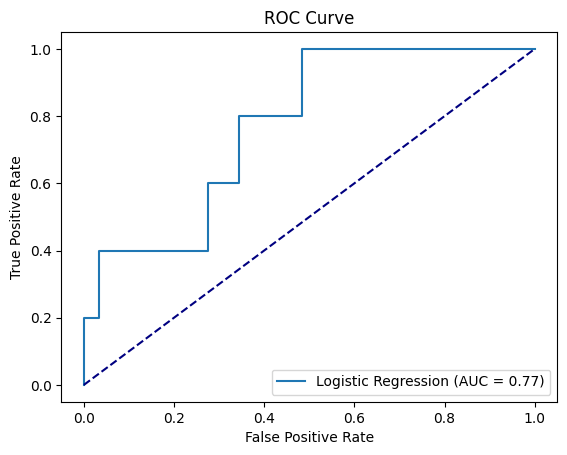

In [32]:
# Load data (handling potential byte order mark)
admission_annotation = pd.read_csv('/content/drive/MyDrive/fall 24/cdss discovery - ucsf covid/Key data files/admission_annotation.csv')
gene_symbols = pd.read_csv('/content/drive/MyDrive/fall 24/cdss discovery - ucsf covid/Key data files/gene_symbols.csv')
admission_norm_gene_exp_df = pd.read_csv('/content/drive/MyDrive/fall 24/cdss discovery - ucsf covid/Key data files/admission_norm_gene_exp_df.csv', index_col=0)


# Merge and clean gene expression data
admission_norm_gene_exp_df = admission_norm_gene_exp_df.merge(gene_symbols, left_index=True, right_on='gene_ids', how='left')
admission_norm_gene_exp_df = admission_norm_gene_exp_df.set_index('gene_symbols').drop(['gene_ids', 'Unnamed: 0'], axis=1)
admission_norm_gene_exp_df = admission_norm_gene_exp_df.dropna(axis=0)

# Remove hyphens from 'X' column in admission_annotation
admission_annotation['X'] = admission_annotation['X'].str.replace('-', '')

# Transpose, merge, and prepare data
X = admission_norm_gene_exp_df.transpose()
X = X.merge(admission_annotation, left_index=True, right_on='X', how='inner').set_index('X')

y = X['Diagnosis']
X = X.drop('Diagnosis', axis=1)  # Keep 'Steroids'

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the model (increased max_iter and used lbfgs solver for better convergence)
model = LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs')  # Explicitly set solver
model.fit(X_train_scaled, y_train)


y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

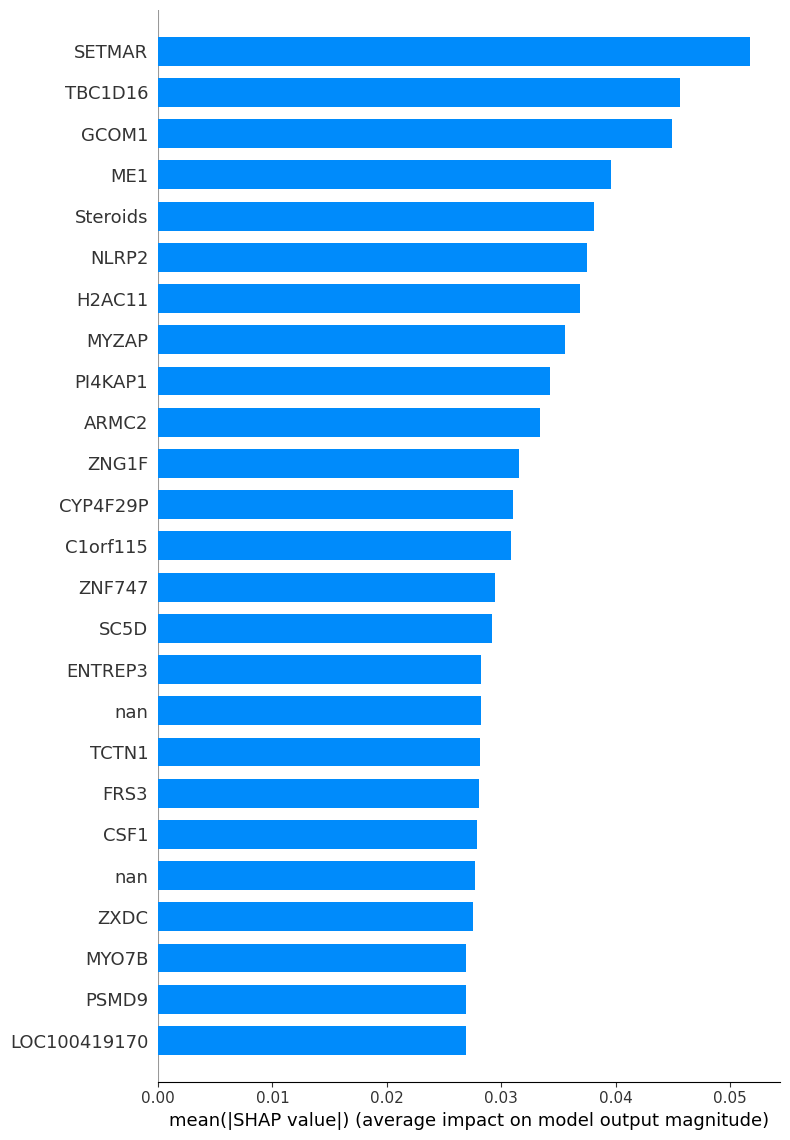

In [34]:
# SHAP values
explainer = shap.Explainer(model, X_train_scaled, feature_names=X.columns) #feature names for labels
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar", max_display=25) # Show top features on barplot
plt.show()

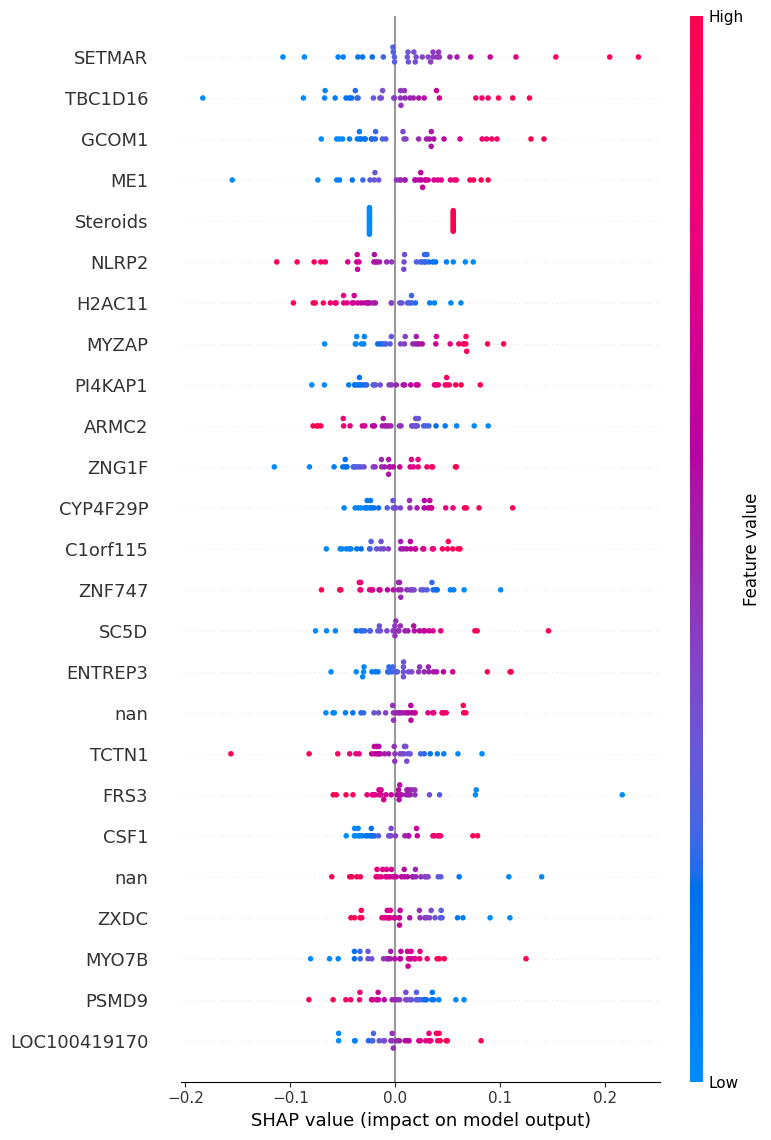

In [35]:
# SHAP values
explainer = shap.Explainer(model, X_train_scaled, feature_names=X.columns) #feature names for labels
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="dot", max_display=25)
plt.show()

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shap

ROC AUC Score: 0.70
Accuracy: 0.85
Confusion Matrix:
[[28  1]
 [ 4  1]]


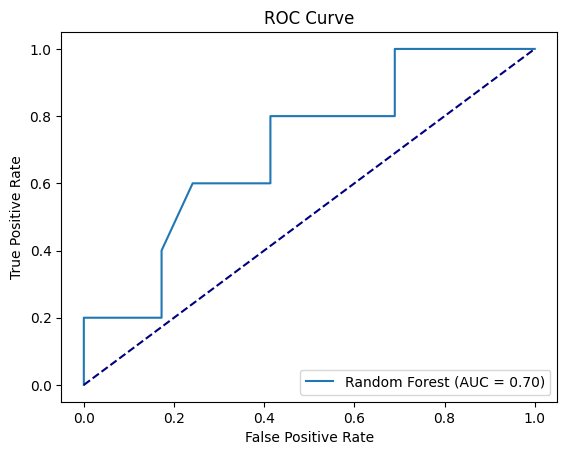

In [38]:
# Load data (handling potential byte order mark)
admission_annotation = pd.read_csv('/content/drive/MyDrive/fall 24/cdss discovery - ucsf covid/Key data files/admission_annotation.csv')
gene_symbols = pd.read_csv('/content/drive/MyDrive/fall 24/cdss discovery - ucsf covid/Key data files/gene_symbols.csv')
admission_norm_gene_exp_df = pd.read_csv('/content/drive/MyDrive/fall 24/cdss discovery - ucsf covid/Key data files/admission_norm_gene_exp_df.csv', index_col=0)


# Merge and clean gene expression data
admission_norm_gene_exp_df = admission_norm_gene_exp_df.merge(gene_symbols, left_index=True, right_on='gene_ids', how='left')
admission_norm_gene_exp_df = admission_norm_gene_exp_df.set_index('gene_symbols').drop(['gene_ids', 'Unnamed: 0'], axis=1)
admission_norm_gene_exp_df = admission_norm_gene_exp_df.dropna(axis=0)

# Remove hyphens from 'X' column in admission_annotation
admission_annotation['X'] = admission_annotation['X'].str.replace('-', '')

# Transpose, merge, and prepare data
X = admission_norm_gene_exp_df.transpose()
X = X.merge(admission_annotation, left_index=True, right_on='X', how='inner').set_index('X')

y = X['Diagnosis']
X = X.drop('Diagnosis', axis=1)  # Keep 'Steroids'

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust hyperparameters like n_estimators
model.fit(X_train_scaled, y_train)

# Make predictions (using predict_proba for probabilities)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)


# Evaluate the model (including AUC-ROC)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use predict_proba for AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use probabilities
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()